In [2]:
import zipfile
%matplotlib inline
import numpy as np
import ast
import json
import urllib
import urllib2
from cStringIO import StringIO
import pandas as pd
import requests
import os
import geopandas as gpd
import matplotlib.pylab as pl
from fiona.crs import from_epsg
import fiona
import matplotlib.pylab as pl
from matplotlib import colors
import shapely
import seaborn as sns
from sklearn.cluster import KMeans
#add necessary libraries
import networkx as nx #library supporting networks
from shapely.geometry import Point, Polygon
import shapely as shp
import fiona
import pylab as pl
import numpy as np
import pandas as pd

%pylab inline

from IPython.display import Image
from IPython.display import clear_output


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
airport = pd.read_csv('../Data/busiest_airport_by_day.csv')
airport.head()

,Unnamed: 0,Airport,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,0,IAH,959.0,1055.0,1058.0,940.0,989.0,1057.0,868.0,876.0,...,792.0,796.0,603.0,646.0,795.0,795.0,792.0,789.0,793.0,603.0
1,1,GEG,43.0,50.0,50.0,46.0,52.0,50.0,48.0,48.0,...,58.0,58.0,41.0,39.0,58.0,58.0,58.0,56.0,56.0,40.0
2,2,YUM,20.0,22.0,22.0,18.0,22.0,22.0,14.0,16.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
3,3,TUS,90.0,98.0,98.0,96.0,94.0,96.0,88.0,93.0,...,103.0,102.0,86.0,86.0,100.0,102.0,102.0,102.0,102.0,83.0
4,4,STL,236.0,304.0,306.0,215.0,267.0,298.0,274.0,273.0,...,336.0,338.0,216.0,229.0,339.0,335.0,343.0,334.0,340.0,226.0


In [3]:
pd.rolling_mean?

In [4]:
airport.head()

,Unnamed: 0,Airport,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,0,IAH,959.0,1055.0,1058.0,940.0,989.0,1057.0,868.0,876.0,...,792.0,796.0,603.0,646.0,795.0,795.0,792.0,789.0,793.0,603.0
1,1,GEG,43.0,50.0,50.0,46.0,52.0,50.0,48.0,48.0,...,58.0,58.0,41.0,39.0,58.0,58.0,58.0,56.0,56.0,40.0
2,2,YUM,20.0,22.0,22.0,18.0,22.0,22.0,14.0,16.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
3,3,TUS,90.0,98.0,98.0,96.0,94.0,96.0,88.0,93.0,...,103.0,102.0,86.0,86.0,100.0,102.0,102.0,102.0,102.0,83.0
4,4,STL,236.0,304.0,306.0,215.0,267.0,298.0,274.0,273.0,...,336.0,338.0,216.0,229.0,339.0,335.0,343.0,334.0,340.0,226.0


In [5]:
# creating a rolling mean dataframe
rolling_mean_airport = airport.drop(['Unnamed: 0', 'Airport'], axis=1)
rolling_mean_airport = rolling_mean_airport.transpose()
rolling_mean_airport = pd.rolling_mean(rolling_mean_airport, window=7)
rolling_mean_airport.fillna(0, inplace=True)
rolling_mean_airport = rolling_mean_airport.transpose()
npairport_rolling_mean = rolling_mean_airport.iloc[::,6::].as_matrix()

C:\Users\Hrafnkell\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).mean()


In [6]:
namesairport = airport.Airport

In [7]:
npairport = airport.iloc[::,2::].as_matrix()

In [8]:
npairport

array([[  959.,  1055.,  1058., ...,   789.,   793.,   603.],
       [   43.,    50.,    50., ...,    56.,    56.,    40.],
       [   20.,    22.,    22., ...,     8.,     8.,     8.],
       ..., 
       [   20.,    22.,    24., ...,    14.,    14.,    10.],
       [   nan,    nan,    nan, ...,     4.,     4.,     4.],
       [  123.,   154.,   154., ...,   145.,   147.,    89.]])

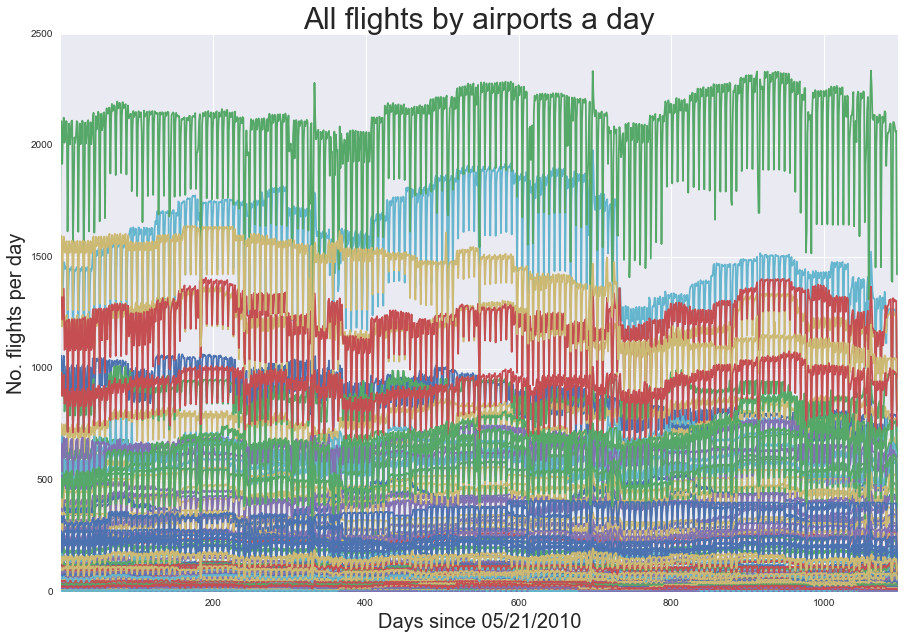

In [9]:
pl.figure(figsize=(15,10))
for i in range(npairport.shape[0]):
    allrides = [sum(npairport[i,j]) for j in range(npairport.shape[1])]
    pl.plot(allrides)
pl.xlim([1,1096])
pl.xlabel("Days since 05/21/2010", fontsize=20)
pl.ylabel("No. flights per day", fontsize=20)
pl.title("All flights by airports a day", size=30)

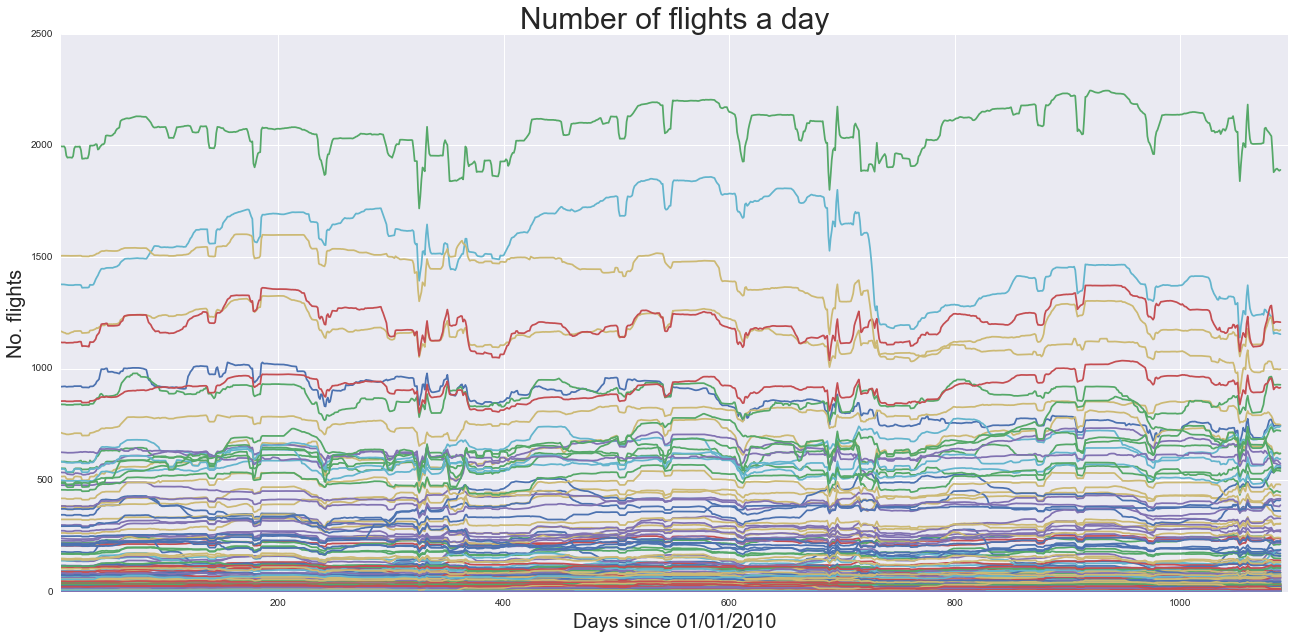

In [11]:
pl.figure(figsize=(22,10))
for i in range(npairport_rolling_mean.shape[0]):
    allrides = [sum(npairport_rolling_mean[i,j]) for j in range(npairport_rolling_mean.shape[1])]
    pl.plot(allrides)
pl.xlim([7,1096])
pl.xlabel("Days since 01/01/2010", fontsize=20)
pl.ylabel("No. flights", fontsize=20)
pl.title("Number of flights a day", size=30)

pl.savefig('../Data/all_flights.png')

In [192]:
npairport_rolling_mean.shape

(329L, 1094L)

In [7]:
npairport.shape

(329L, 1096L)

In [220]:
rng_rolling_mean = pd.date_range('01/01/2014', periods=npairport_rolling_mean.shape[1], freq='D')
print ("nominal date range given the metadata\n", rng_rolling_mean)

('nominal date range given the metadata\n', DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2016-12-16', '2016-12-17', '2016-12-18', '2016-12-19',
               '2016-12-20', '2016-12-21', '2016-12-22', '2016-12-23',
               '2016-12-24', '2016-12-25'],
              dtype='datetime64[ns]', length=1090, freq='D'))


In [8]:
rng = pd.date_range('01/01/2014', periods=npairport.shape[1], freq='D')
print ("nominal date range given the metadata\n", rng)

('nominal date range given the metadata\n', DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=1096, freq='D'))


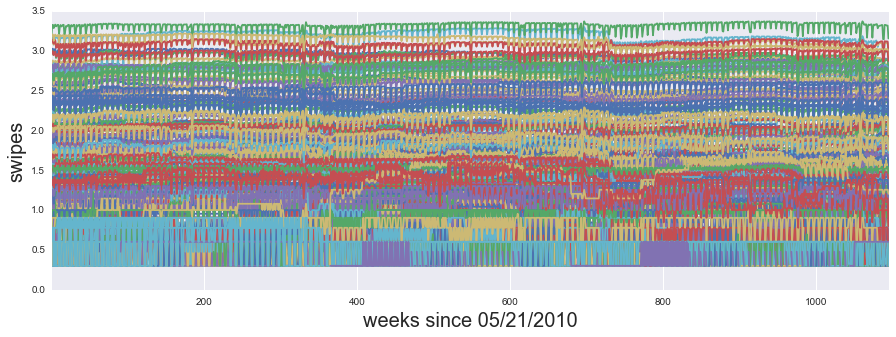

In [76]:
# plot data in log space (may take a while to plot - the counter needs to get to 23)
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)
npairport = npairport.astype(float)
npairport[npairport == -1] = float('NaN')
logrides = np.log10(npairport)

#pl.figure(figsize=(15,10))
for i in range(logrides.shape[0]):
    #logrides = [sum(logrides[i,j]) for j in range(logrides.shape[1])]
    pl.plot(logrides[i])
    
pl.xlim([1,1096])
pl.xlabel("weeks since 05/21/2010", fontsize=20)
tmp = pl.ylabel("swipes", fontsize=20)


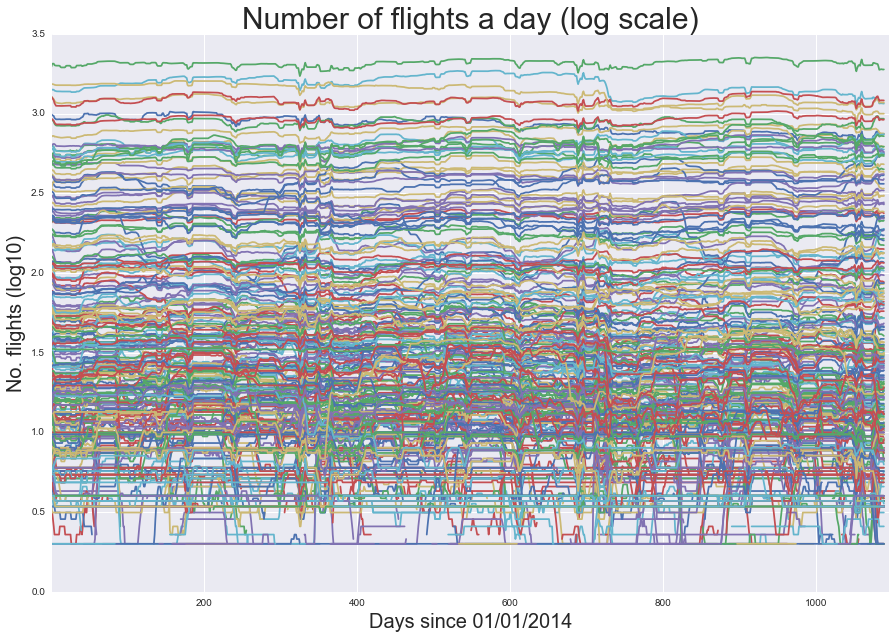

In [289]:
# plot data in log space (may take a while to plot - the counter needs to get to 23)
fig = pl.figure(figsize=(15,10))
ax = fig.add_subplot(111)
npairport_rolling_mean = npairport_rolling_mean.astype(float)
npairport_rolling_mean[npairport_rolling_mean == -1] = float('NaN')
logrides = np.log10(npairport_rolling_mean)

#pl.figure(figsize=(15,10))
for i in range(logrides.shape[0]):
    #logrides = [sum(logrides[i,j]) for j in range(logrides.shape[1])]
    pl.plot(logrides[i])
    
pl.xlim([1,1096])
pl.xlabel("Days since 01/01/2014", fontsize=20)
pl.title('Number of flights a day (log scale)', size=30)
tmp = pl.ylabel("No. flights (log10)", fontsize=20)
pl.savefig('../Data/all_flights_log10.png')

In [196]:
npairport = np.nan_to_num(npairport)
npairport_rolling_mean = np.nan_to_num(npairport_rolling_mean)

In [197]:
npairport_sum = npairport.sum(axis=0)
npairport_sum_rolling_mean = npairport_rolling_mean.sum(axis=0)
npairport_sum

array([ 28244.,  33377.,  33451., ...,  31712.,  31764.,  24092.])

In [198]:
npairport_sum_rolling_mean

array([     0.        ,      0.        ,      0.        , ...,
        29681.42857143,  29635.71428571,  29649.42857143])

In [13]:
rng.shape

(1096L,)

3 sigma threshold 23084.7
('outlier index', (array([ 330,  694, 1058, 1067], dtype=int64),))
('outlier date', DatetimeIndex(['2014-11-27', '2015-11-26', '2016-11-24', '2016-12-03'], dtype='datetime64[ns]', freq=None))


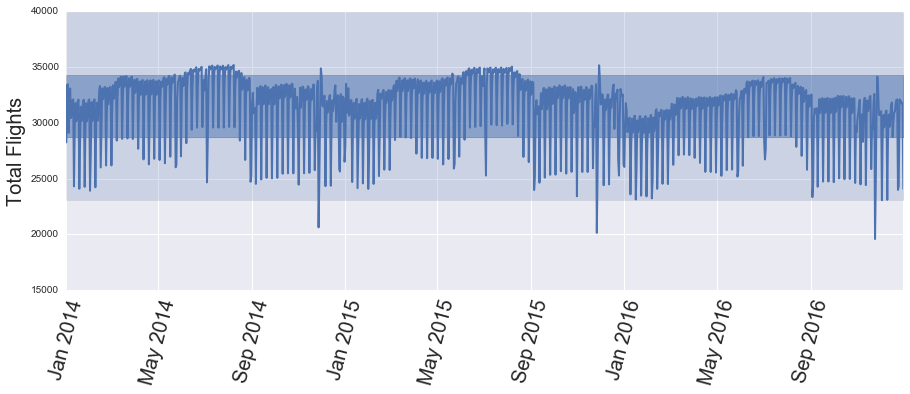

In [249]:
pl.figure(figsize=(15,5))
pl.plot(rng, npairport_sum, lw = 2)
pl.xticks(rotation = 75, fontsize=20)
pl.ylabel("Total Flights", fontsize=20)  
onesig = np.std(npairport_sum)
tsthresh = np.nanmean(npairport_sum)  - 3 * onesig
print ("3 sigma threshold %.1f"%tsthresh)
print ("outlier index", np.where(npairport_sum < tsthresh))
print ("outlier date", rng[np.where(npairport_sum < tsthresh)])
pl.fill_between(rng, np.nanmean(npairport_sum) - onesig,
                np.nanmean(npairport_sum) + onesig, alpha=0.5)
pl.fill_between(rng, np.nanmean(npairport_sum) - 3 * onesig,
                 np.nanmean(npairport_sum) + 3 * onesig, alpha = 0.2)
pl.savefig('../Data/event_detection.png')

In [204]:
rng.shape

(1096L,)

In [203]:
npairport_sum_rolling_mean.shape

(1094L,)

In [ ]:
[0:3]

In [213]:
npairport_sum_rolling_mean = npairport_sum_rolling_mean[4:]

In [214]:
npairport_sum_rolling_mean.shape

(1090L,)

3 sigma threshold 27411.8
('outlier index', (array([], dtype=int64),))
('outlier date', DatetimeIndex([], dtype='datetime64[ns]', freq=None))


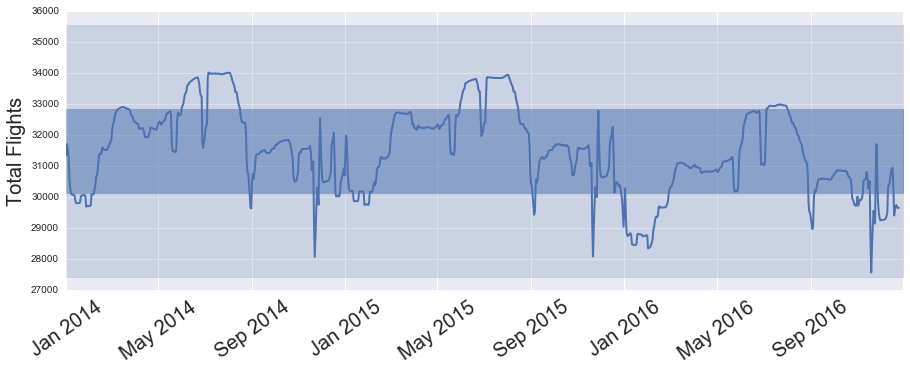

In [284]:
pl.figure(figsize=(15,5))
pl.plot(rng_rolling_mean, npairport_sum_rolling_mean, lw = 2)
pl.xticks(rotation = 35, fontsize=20)
pl.ylabel("Total Flights", fontsize=20)  
onesig = np.std(npairport_sum_rolling_mean)
tsthresh = np.nanmean(npairport_sum_rolling_mean)  - 3 * onesig
print ("3 sigma threshold %.1f"%tsthresh)
print ("outlier index", np.where(npairport_sum_rolling_mean < tsthresh))
print ("outlier date", rng[np.where(npairport_sum_rolling_mean < tsthresh)])
pl.fill_between(rng, np.nanmean(npairport_sum_rolling_mean) - onesig,
                np.nanmean(npairport_sum_rolling_mean) + onesig, alpha=0.5)
pl.fill_between(rng, np.nanmean(npairport_sum_rolling_mean) - 3 * onesig,
                 np.nanmean(npairport_sum_rolling_mean) + 3 * onesig, alpha = 0.2)
pl.savefig('../Data/event_detection_weeks.png')

# Looking at Chicago

In [128]:
chicago = airport[airport.Airport=='ORD']
chicago.drop(['Unnamed: 0'], axis=1, inplace=True)

C:\Users\Hrafnkell\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [27]:
days = []
for i in range(1096):
    days.append(i+1)

In [36]:
x = np.array(days)
y = np.array(chicago.iloc[:,1:])

In [40]:
y.shape

(1L, 1096L)

In [30]:
len(days)

1096

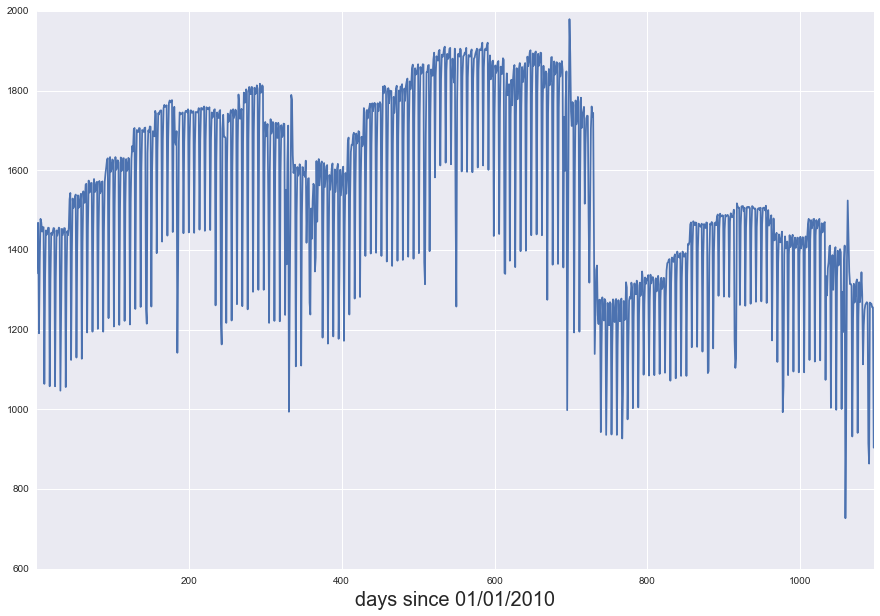

In [75]:
pl.figure(figsize=(15,10))
pl.plot(days,airport.iloc[143, 2:])
pl.xlabel("days since 01/01/2010", fontsize=20)
pl.xlim([1,1096])
pl.show()

In [62]:
len(days)

1096

In [52]:
npairport_sum

array([ 28244.,  33377.,  33451., ...,  31712.,  31764.,  24092.])

In [228]:
rolling_mean_airport.iloc[143,2:].shape

(1094L,)

In [229]:
rng_rolling_mean.shape

(1090L,)

3 sigma threshold 982.6
('outlier index', (array([], dtype=int64),))


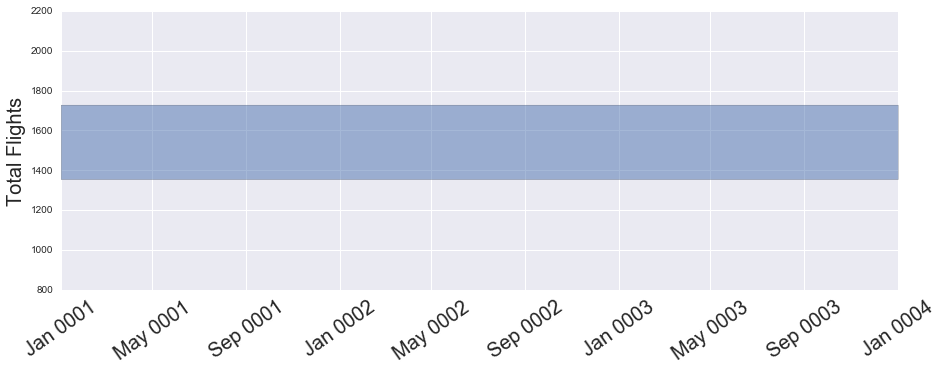

In [260]:
pl.figure(figsize=(15,5))
pl.plot(rng_rolling_mean, rolling_mean_airport.iloc[143,6:], lw = 2)
pl.xticks(rotation = 35, fontsize=20)
pl.xlim([1,1096])
pl.ylabel("Total Flights", fontsize=20)  
onesig = np.std(rolling_mean_airport.iloc[143,6:])
tsthresh = np.nanmean(rolling_mean_airport.iloc[143,6:])  - 3 * onesig
print ("3 sigma threshold %.1f"%tsthresh)
print ("outlier index", np.where(rolling_mean_airport.iloc[143,6:] < tsthresh))
#print ("outlier date", days[np.where(airport.iloc[143,2:] < tsthresh)])
pl.fill_between(days, np.nanmean(rolling_mean_airport.iloc[143,6:]) - onesig,
                np.nanmean(rolling_mean_airport.iloc[143,6:]) + onesig, alpha=0.5)
pl.fill_between(rng_rolling_mean, np.nanmean(rolling_mean_airport.iloc[143,6:]) - 3 * onesig,
                 np.nanmean(rolling_mean_airport.iloc[143,6:]) + 3 * onesig, alpha = 0.2)

In [294]:
rng.shape

(1096L,)

In [298]:
airport.iloc[:,2:].shape

(329, 1096)

3 sigma threshold 23084.7
('outlier index', (array([   0,    1,    2, ..., 1093, 1094, 1095], dtype=int64),))


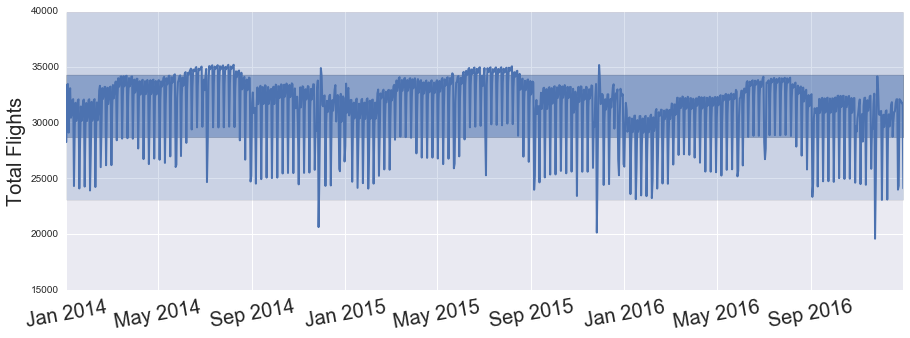

In [302]:
pl.figure(figsize=(15,5))
pl.plot(rng, npairport_sum, lw = 2)
pl.xticks(rotation = 10, fontsize=20)
pl.ylabel("Total Flights", fontsize=20)  
onesig = np.std(npairport_sum)
tsthresh = np.nanmean(npairport_sum)  - 3 * onesig
print ("3 sigma threshold %.1f"%tsthresh)
print ("outlier index", np.where(airport.iloc[143,2:] < tsthresh))

pl.fill_between(rng, np.nanmean(npairport_sum) - onesig,
                np.nanmean(npairport_sum) + onesig, alpha=0.5)

pl.fill_between(rng, np.nanmean(npairport_sum) - 3 * onesig,
                 np.nanmean(npairport_sum) + 3 * onesig, alpha = 0.2)

pl.savefig('../Data/event_detection.png')

3 sigma threshold 834.8
('outlier index', (array([1058], dtype=int64),))


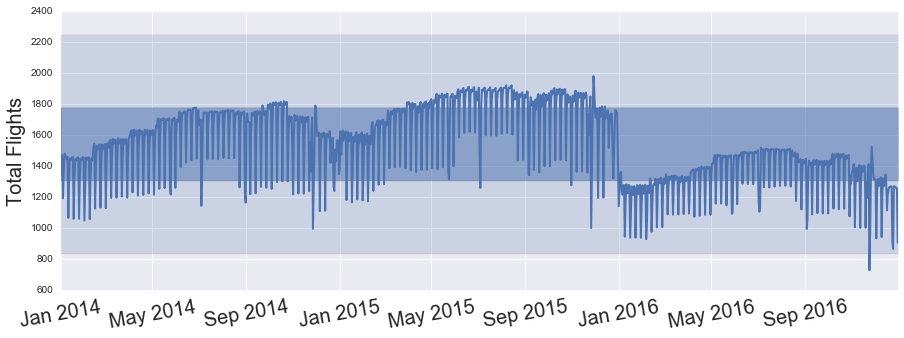

In [303]:
pl.figure(figsize=(15,5))
pl.plot(rng, airport.iloc[143,2:], lw = 2)
pl.xticks(rotation = 10, fontsize=20)
pl.ylabel("Total Flights", fontsize=20)  
onesig = np.std(airport.iloc[143,2:])
tsthresh = np.nanmean(airport.iloc[143,2:])  - 3 * onesig
print ("3 sigma threshold %.1f"%tsthresh)
print ("outlier index", np.where(airport.iloc[143,2:] < tsthresh))

pl.fill_between(rng, np.nanmean(airport.iloc[143,2:]) - onesig,
                np.nanmean(airport.iloc[143,2:]) + onesig, alpha=0.5)

pl.fill_between(rng, np.nanmean(airport.iloc[143,2:]) - 3 * onesig,
                 np.nanmean(airport.iloc[143,2:]) + 3 * onesig, alpha = 0.2)

pl.savefig('../Data/event_detection_chicago.png')

3 sigma threshold 834.8
('outlier index', (array([1058], dtype=int64),))


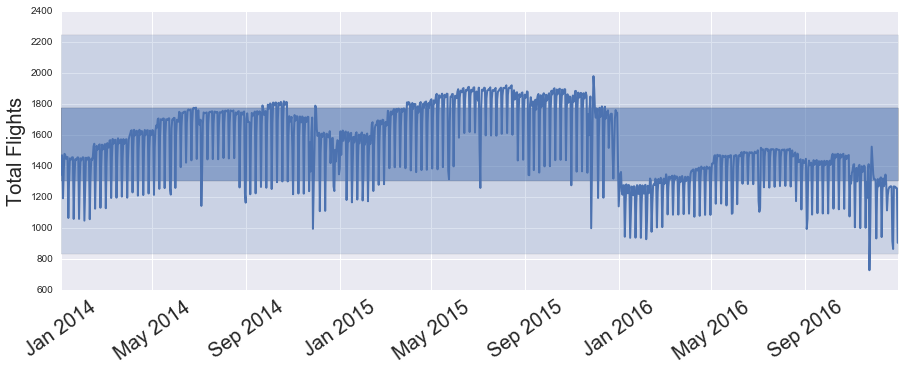

In [283]:
pl.figure(figsize=(15,5))
pl.plot(rng, airport.iloc[143,2:], lw = 2)
pl.xticks(rotation = 35, fontsize=20)
pl.ylabel("Total Flights", fontsize=20)  
onesig = np.std(airport.iloc[143,2:])
tsthresh = np.nanmean(airport.iloc[143,2:])  - 3 * onesig
print ("3 sigma threshold %.1f"%tsthresh)
print ("outlier index", np.where(airport.iloc[143,2:] < tsthresh))
#print ("outlier date", days[np.where(airport.iloc[143,2:] < tsthresh)])
pl.fill_between(rng, np.nanmean(airport.iloc[143,2:]) - onesig,
                np.nanmean(airport.iloc[143,2:]) + onesig, alpha=0.5)
pl.fill_between(rng, np.nanmean(airport.iloc[143,2:]) - 3 * onesig,
                 np.nanmean(airport.iloc[143,2:]) + 3 * onesig, alpha = 0.2)


In [74]:
airport.columns.tolist()[1060]

'2016-11-24'

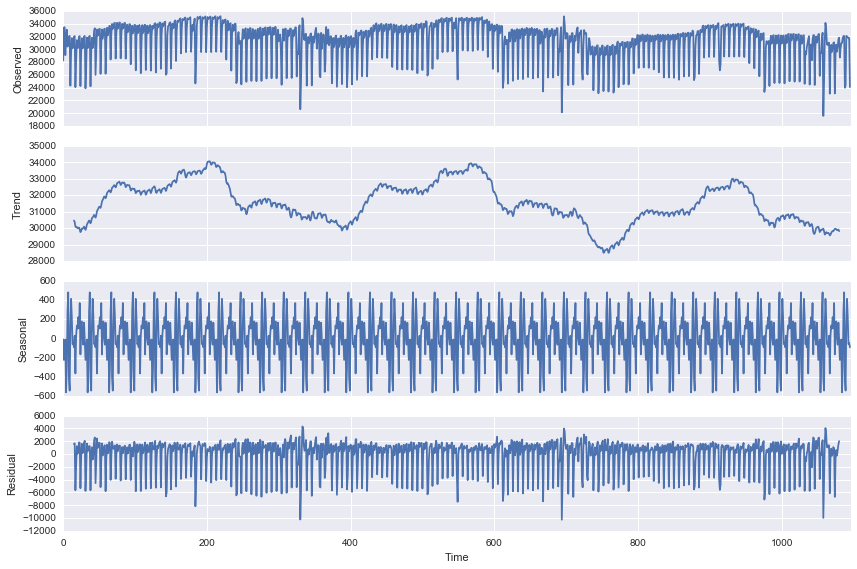

In [253]:
##Seasonal Decomposition of low income energy

import statsmodels.api as sm

data = np.array(npairport_sum)

res = sm.tsa.seasonal_decompose(data, freq=30)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res.plot()
plt.savefig('../Data/decomposition.png')

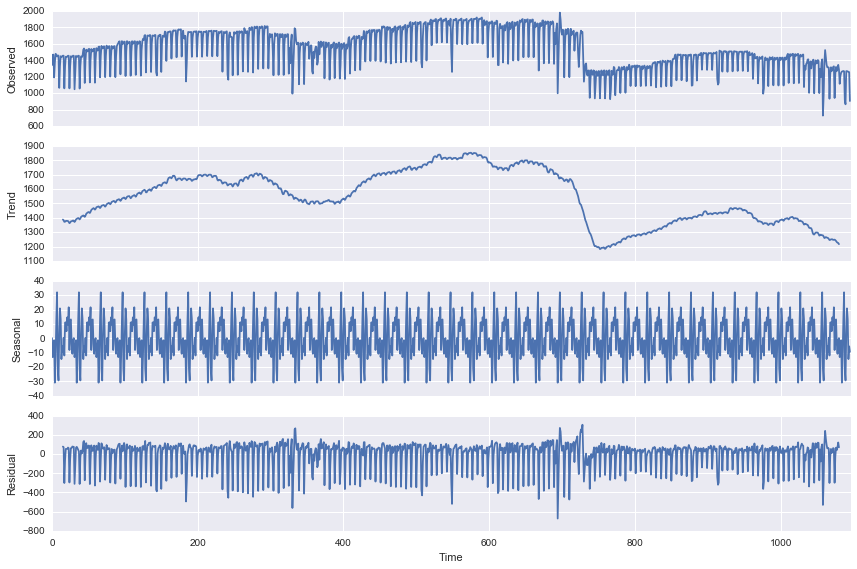

In [313]:
##Seasonal Decomposition of low income energy

import statsmodels.api as sm

C_town = np.array(chicago.iloc[:,1:])
data = np.array(C_town)

res = sm.tsa.seasonal_decompose(data[:365], freq=30)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res.plot()
plt.savefig('../Data/decomposition_chicago.png')

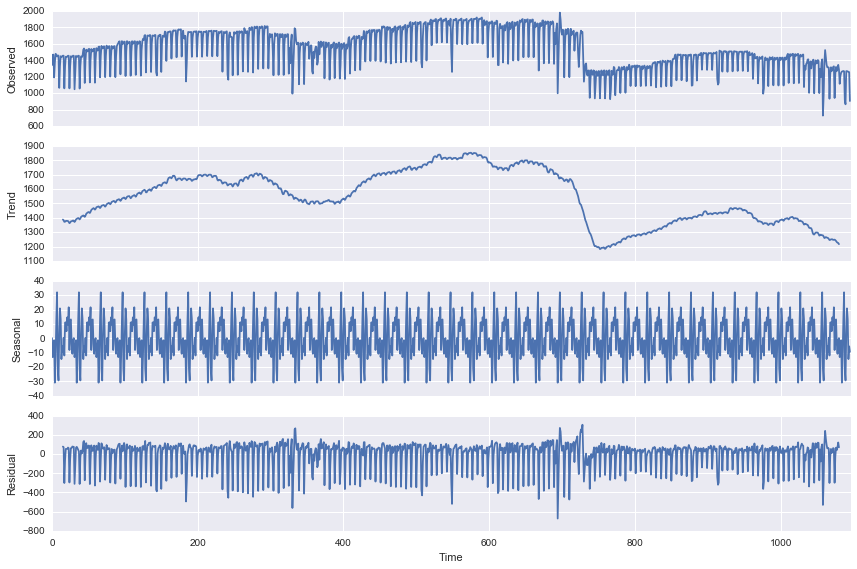

In [312]:
##Seasonal Decomposition of low income energy

import statsmodels.api as sm

C_town = np.array(chicago.iloc[:,1:])
data = np.array(y)

res = sm.tsa.seasonal_decompose(data, freq=30)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res.plot()

In [311]:
np.array(chicago.iloc[:,1:]).shape

(1L, 1096L)

## Rolling mean 